In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/purchase_prediction.csv


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style='darkgrid')
import matplotlib.pyplot as plt
from matplotlib import style
#sta matplotlib to inline and displays graphs below the corresponding cell.
%matplotlib inline
import os
from sklearn.datasets import *
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("../input/purchase_prediction.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
#lets drop the 'user id' which is not useful for our prediction further
df.drop("User ID",axis=1,inplace=True)

In [5]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [6]:
df.shape

(400, 4)

In [7]:
#Data Imputation
df.isnull().sum()

Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [8]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Gender,400,2,Female,204,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,400,NaN,NaN,NaN,37.655,10.4829,18,29.75,37,46,60
EstimatedSalary,400,NaN,NaN,NaN,69742.5,34097,15000,43000,70000,88000,150000
Purchased,400,NaN,NaN,NaN,0.3575,0.479864,0,0,0,1,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
Gender             400 non-null object
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


we can see that there is no null or missing values

In [10]:
df.Purchased.value_counts()

0    257
1    143
Name: Purchased, dtype: int64

#######The values are imbalanced in Label, We need to do resampling Techniques


In [11]:
#DATA WRANGLING
from sklearn import preprocessing  
df=df.apply(preprocessing.LabelEncoder().fit_transform)
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,1,4,0
1,1,17,5,0
2,0,8,26,0
3,0,9,39,0
4,1,1,57,0


In [12]:
from statsmodels.stats.proportion import proportions_ztest

In [13]:
# for Gender and Attrition
pd.crosstab(df['Purchased'],df['Gender'])

Gender,0,1
Purchased,,
0,127,130
1,77,66


In [14]:
count=np.array([77,66])
obs=np.array([204,196])

In [15]:
zstat,pvalue=proportions_ztest(count,obs)
print('z value: %0.3f, p value: %0.3f' %(zstat,pvalue))

z value: 0.849, p value: 0.396


###its accepting Null hypothesis which is the proportion of male = proportin of female

In [16]:
from scipy.stats import ttest_ind

In [17]:
grp=df.groupby('Purchased')
grp_0=grp.get_group(0)
grp_1=grp.get_group(1)

In [18]:
mean1=grp_1.Age.mean()
mean1

28.39160839160839

In [19]:
mean0=grp_0.Age.mean()
mean0

14.793774319066149

In [20]:
ttest_ind(grp_0['Age'],grp_1['Age'])

Ttest_indResult(statistic=-15.86638147378888, pvalue=2.800233943272622e-44)

######based on the Pvalue which is very less and showing that very less probability of Null Hypothesis to become True

#####as it is lesser than significant level(0.05), we have to accept the ALTERNATE HYPOTHESIS and reject Null Hypothesis

In [21]:
#lets find  the pvalue for EstimatedSalary
grp=df.groupby('Purchased')
grp_0=grp.get_group(0)
grp_1=grp.get_group(1)

In [22]:
mean1=grp_1.EstimatedSalary.mean()
mean1

63.91608391608391

In [23]:
mean0=grp_0.EstimatedSalary.mean()
mean0

42.459143968871594

In [24]:
ttest_ind(grp_0['EstimatedSalary'],grp_1['EstimatedSalary'])

Ttest_indResult(statistic=-7.34706711338423, pvalue=1.1577792470542706e-12)

####### As we can see the pvalue is lesser than significant level accept Alternate Hypothesis which are the mean of Estimated Salary 0purchased

#####Lets drop the column Gender as it is accepting NULL Hypothesis to be true

In [25]:
df.drop('Gender',1,inplace=True)

In [26]:
df.head()

,Age,EstimatedSalary,Purchased
0,1,4,0
1,17,5,0
2,8,26,0
3,9,39,0
4,1,57,0


##since there are in different units, we have to scale the data after splitting the X,y labels

In [27]:
y=df.Purchased
X=df.drop('Purchased',1)

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [29]:
from sklearn.preprocessing import LabelEncoder,PolynomialFeatures,StandardScaler
se=StandardScaler()
X_train=se.fit_transform(X_train)
X_test=se.transform(X_test)

In [30]:
print(X_train.shape,X_test.shape)

(280, 2) (120, 2)


In [31]:
#apply SMOTE viz resampling technique
from  imblearn.over_sampling import SMOTE

Using TensorFlow backend.


In [32]:
sm=SMOTE(random_state=1,ratio=1.0)
X_train,y_train=sm.fit_sample(X_train,y_train)

In [33]:
## Apply Logistic Regression with balanced data by SMOTE
from sklearn.linear_model import LogisticRegression
smote=LogisticRegression()
smote.fit(X_train,y_train)
somote_pred=smote.predict(X_test)


In [34]:
#checking Accuracy
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score
from sklearn.metrics import classification_report
from mlxtend.evaluate import confusion_matrix


In [35]:
accuracy_score(y_test,somote_pred)

0.825

In [36]:
print('classification:\n',classification_report(y_test,somote_pred))


classification:
               precision    recall  f1-score   support

           0       0.89      0.81      0.85        72
           1       0.75      0.85      0.80        48

    accuracy                           0.82       120
   macro avg       0.82      0.83      0.82       120
weighted avg       0.83      0.82      0.83       120



In [37]:
f1_score(y_test,somote_pred)

0.7961165048543689

In [38]:
print('recall score:',recall_score(y_test,somote_pred))

recall score: 0.8541666666666666


In [39]:
print('precision_score',precision_score(y_test,somote_pred))

precision_score 0.7454545454545455


Text(30.5, 0.5, 'Predicted')

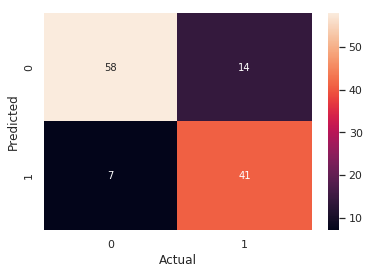

In [40]:
sns.heatmap(confusion_matrix(y_test,somote_pred),annot=True)
plt.xlabel('Actual')
plt.ylabel('Predicted')

## TP=41 FP=7 TN=58 FN=14

#### APPly KNN MODEL


In [41]:
df.head()

,Age,EstimatedSalary,Purchased
0,1,4,0
1,17,5,0
2,8,26,0
3,9,39,0
4,1,57,0


In [42]:
y=df.Purchased
X=df.drop('Purchased',1)

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [44]:
from sklearn.preprocessing import LabelEncoder,PolynomialFeatures,StandardScaler
se=StandardScaler()
X_train=se.fit_transform(X_train)
X_test=se.transform(X_test)

In [45]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [46]:
knn=KNeighborsClassifier()

In [47]:
param={'n_neighbors':np.arange(1,50),'weights':['uniform','distance']}
gs=GridSearchCV(knn,param,cv=5,scoring='roc_auc')
gs.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

In [48]:
param={'n_neighbors':np.arange(1,50),'weights':['uniform','distance']}
gs=GridSearchCV(knn,param,cv=5,scoring='roc_auc')
gs.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

In [49]:
gs.best_params_

{'n_neighbors': 23, 'weights': 'uniform'}

In [50]:
knn=KNeighborsClassifier(n_neighbors=23,weights='uniform')

In [51]:
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)

In [52]:
print('Accuracy Score:',accuracy_score(y_test,y_pred))

Accuracy Score: 0.875


In [53]:
print('the confusion matrix:\n',confusion_matrix(y_test,y_pred))

the confusion matrix:
 [[62 10]
 [ 5 43]]


In [54]:
print('The classification report:',classification_report(y_test,y_pred))

The classification report:               precision    recall  f1-score   support

           0       0.93      0.86      0.89        72
           1       0.81      0.90      0.85        48

    accuracy                           0.88       120
   macro avg       0.87      0.88      0.87       120
weighted avg       0.88      0.88      0.88       120



In [55]:
print('recall score:',recall_score(y_test,y_pred))

recall score: 0.8958333333333334


In [56]:
print('precision_score',precision_score(y_test,y_pred))

precision_score 0.8113207547169812


Text(30.5, 0.5, 'Predicted')

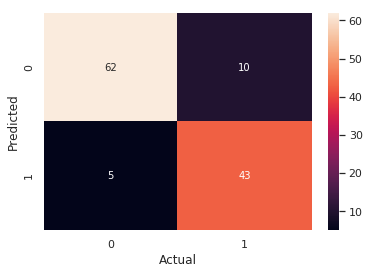

In [57]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
plt.xlabel('Actual')
plt.ylabel('Predicted')

#### TP=43 TN=62 FP=5 FN=10

#### Decision Tree

In [58]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [59]:
parms= {'criterion':['entropy','gini']}
grids=GridSearchCV(dt,parms,cv=10,scoring='roc_auc')
grids.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['entropy', 'gini']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,

In [60]:
grids.best_params_

{'criterion': 'entropy'}

In [61]:
dt=DecisionTreeClassifier(criterion='entropy',random_state=0)
dt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [62]:
y_pred=dt.predict(X_test)

In [63]:
print('Accuracy Score:',accuracy_score(y_test,y_pred))

Accuracy Score: 0.85


In [64]:
print('the confusion matrix:\n',confusion_matrix(y_test,y_pred))

the confusion matrix:
 [[61 11]
 [ 7 41]]


In [65]:
print('The classification report:',classification_report(y_test,y_pred))

The classification report:               precision    recall  f1-score   support

           0       0.90      0.85      0.87        72
           1       0.79      0.85      0.82        48

    accuracy                           0.85       120
   macro avg       0.84      0.85      0.85       120
weighted avg       0.85      0.85      0.85       120



In [66]:
print('recall score:',recall_score(y_test,y_pred))

recall score: 0.8541666666666666


In [67]:
print('precision_score',precision_score(y_test,y_pred))

precision_score 0.7884615384615384


Text(30.5, 0.5, 'Predicted')

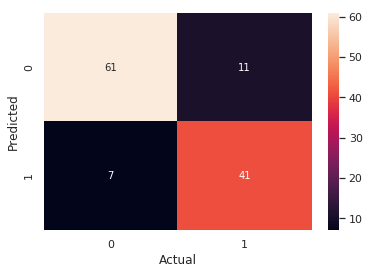

In [68]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
plt.xlabel('Actual')
plt.ylabel('Predicted')

TP=41 FN=11 TN=61 FP=7

#### Naive Bayes

In [69]:
#import a Library
from sklearn.naive_bayes import GaussianNB

In [70]:
gb=GaussianNB()

In [71]:
gb.fit(X_train,y_train)
y_pred=gb.predict(X_test)

In [72]:
print('Accuracy Score:',accuracy_score(y_test,y_pred))

Accuracy Score: 0.8583333333333333


In [73]:
print('the confusion matrix:\n',confusion_matrix(y_test,y_pred))

the confusion matrix:
 [[64  8]
 [ 9 39]]


In [74]:
print('The classification report:',classification_report(y_test,y_pred))

The classification report:               precision    recall  f1-score   support

           0       0.88      0.89      0.88        72
           1       0.83      0.81      0.82        48

    accuracy                           0.86       120
   macro avg       0.85      0.85      0.85       120
weighted avg       0.86      0.86      0.86       120



Text(30.5, 0.5, 'Predicted')

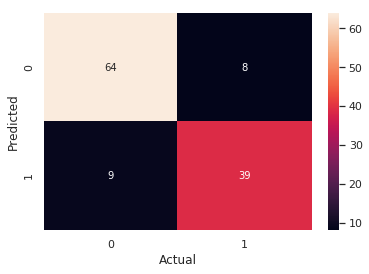

In [75]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
plt.xlabel('Actual')
plt.ylabel('Predicted')

TP=39 FN=8 TN=64 FP=9

#### Random Forest

In [76]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
rf=RandomForestClassifier(n_estimators=50,random_state=0)

In [77]:
rf_var=[]
for val in np.arange(1,50):
    rf=RandomForestClassifier(criterion='entropy',n_estimators=val,random_state=0)
    kfold = KFold(shuffle=True,n_splits=5, random_state=0)
    cv_results = cross_val_score(rf, X, y, cv=kfold, scoring='roc_auc')
    rf_var.append(np.var(cv_results,ddof=1))
    print(val,np.var(cv_results,ddof=1))

1 0.0021577719501543286
2 0.0015446521661201902
3 0.001412977430728588
4 0.0016327553944102979
5 0.0018700320680890697
6 0.002133264125619534
7 0.002332303682779541
8 0.0025305664802341525
9 0.002033324811726551
10 0.001857222711174887
11 0.0017796195129433576
12 0.0018425154275429
13 0.001790461127269056
14 0.0018675115006828351
15 0.0016062092690765268
16 0.0015577364743280422
17 0.0015556500021751646
18 0.0016028062563922822
19 0.0016178443337436788
20 0.0016418734687937548
21 0.0016284259361286266
22 0.0016825683808476947
23 0.0016808930024591836
24 0.0016453233330739176
25 0.0017270012680115849
26 0.0017223426557225053
27 0.001744879602407063
28 0.0016819484353381405
29 0.0016401719139288065
30 0.0016419999507686937
31 0.0016261816290689328
32 0.0016294739276943892
33 0.0016393013201981197
34 0.0016402486325136519
35 0.0016115717331721534
36 0.0016006388048771126
37 0.001616012263428986
38 0.0016263748722746012
39 0.001644184914791154
40 0.0016903967556184426
41 0.0017172996803041

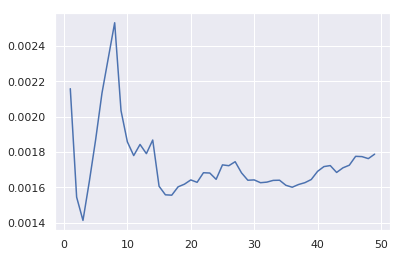

In [78]:
x_axis=np.arange(1,50)
plt.plot(x_axis,rf_var)

In [79]:
rf=RandomForestClassifier(n_estimators=17,random_state=0)

In [80]:
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=17,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [81]:
y_pred=rf.predict(X_test)

In [82]:
print('Accuracy Score:',accuracy_score(y_test,y_pred))

Accuracy Score: 0.8833333333333333


In [83]:
print('the confusion matrix:\n',confusion_matrix(y_test,y_pred))

the confusion matrix:
 [[61 11]
 [ 3 45]]


In [84]:
print('The classification report:',classification_report(y_test,y_pred))

The classification report:               precision    recall  f1-score   support

           0       0.95      0.85      0.90        72
           1       0.80      0.94      0.87        48

    accuracy                           0.88       120
   macro avg       0.88      0.89      0.88       120
weighted avg       0.89      0.88      0.88       120



Text(30.5, 0.5, 'Predicted')

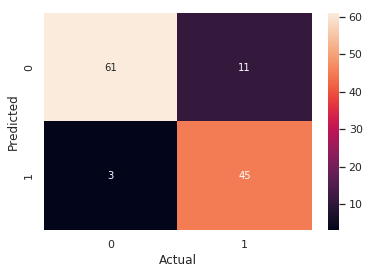

In [85]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
plt.xlabel('Actual')
plt.ylabel('Predicted')

TP=45 FN=11 TN=61 FP=3

#### SECOND Way Of APPROACH By Using Cross Validation

In [86]:
models=[]
models.append(('Logistic',smote))
models.append(('Naive',gb))
models.append(('knn',knn))
models.append(('DT',dt))
models.append(('RF',rf))

Logistic: 0.919477 (0.002642)
Naive: 0.947734 (0.001662)
knn: 0.952931 (0.000454)
DT: 0.866724 (0.003673)
RF: 0.943403 (0.002188)


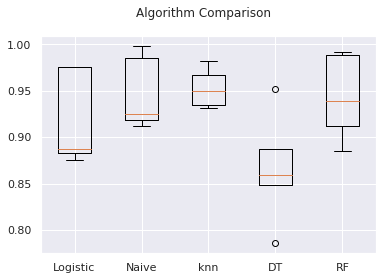

In [87]:
# evaluate each model in turn
results = []
names = []
scoring = 'roc_auc'
for name,model in models:
    kfold = KFold(n_splits=5, random_state=0,shuffle=True)
    cv_results = cross_val_score(model, X, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.var(ddof=1))
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

#### From the above chart we can see that the KNN has good accuracy since our data is numerical and the accuracy will fall down in case of Decision Tree
